# Exploratory Data Analysis (EDA) of the **smoking_health_data_final** dataset

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The necessary libraries have been imported.

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/smoking_health_data_final.csv')

Our dataset has been assigned to the variable **df**.

In [93]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [94]:
df.isna().sum()

,0
age,0
sex,0
current_smoker,0
heart_rate,0
blood_pressure,0
cigs_per_day,14
chol,7


In the [cigs_per_day] and [chol] columns, out of 3900 values each, we have only **14** and **7** missing values, respectively.

In [95]:
df = df.dropna()

In [96]:
df.count()

,0
age,3879
sex,3879
current_smoker,3879
heart_rate,3879
blood_pressure,3879
cigs_per_day,3879
chol,3879


The missing values have been removed from the dataset (a total of **21** values).

In [97]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3879.000000,3879.000000,3879.000000,3879.000000
mean,49.543181,75.699149,9.163702,236.629286
std,8.565955,12.023013,12.035201,44.413846
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


The average age in the dataset is **50**. The youngest person is at least **32** years old, and the oldest is **70** years old.

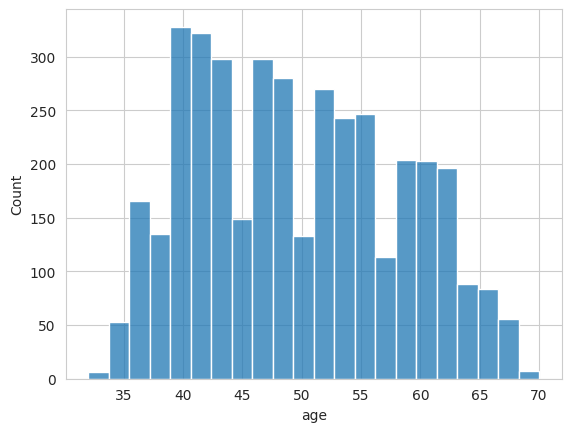

In [98]:
sns.histplot(data=df, x="age")
sns.set_style("whitegrid")
plt.show()

In [99]:
df["age"].describe()

,age
count,3879.000000
mean,49.543181
std,8.565955
min,32.000000
25%,42.000000
50%,49.000000
75%,56.000000
max,70.000000


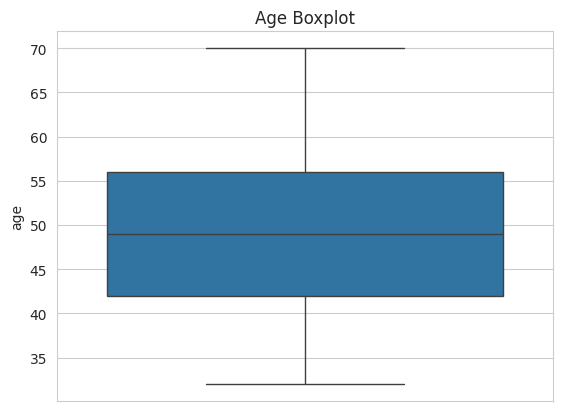

In [100]:
sns.boxplot(y=df["age"])
plt.title("Age Boxplot")
plt.show()

There are no outlier values in the age column of our dataset. The age data appears to be **normally distributed.**

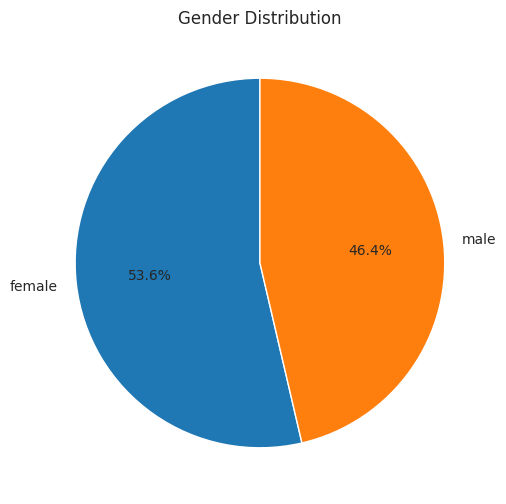

In [101]:
size = df['sex'].value_counts()
labels = size.index

plt.figure(figsize=(6,6))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

We can see that **53.6%** of our dataset is female, and **46.4%** is male.

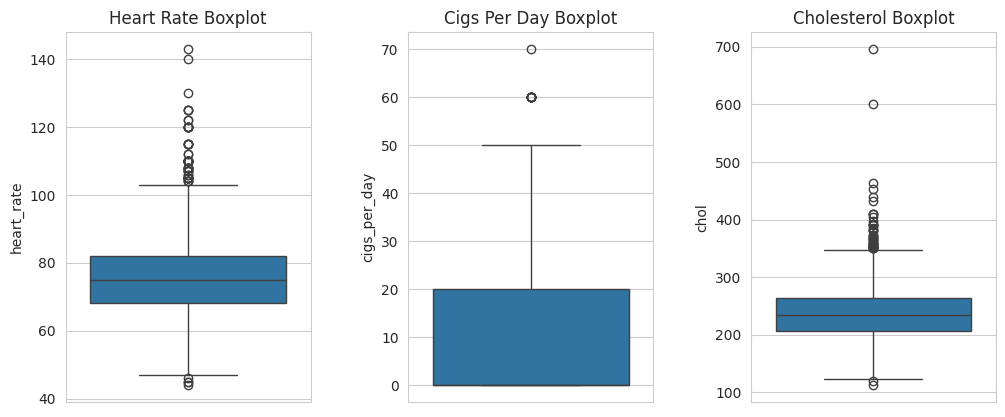

In [102]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
sns.boxplot(y=df["heart_rate"])
plt.title("Heart Rate Boxplot")
plt.subplot(2,3,2)
sns.boxplot(y=df["cigs_per_day"])
plt.title("Cigs Per Day Boxplot")
plt.subplot(2,3,3)
sns.boxplot(y=df["chol"])
plt.title("Cholesterol Boxplot")

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

**heart_rate**

*   The median is around 75.
*   Most values are clustered between 70–85.
*   There are some low outliers (around 40–50 bpm) and some high outliers (120–140 bpm).
*   The majority of values fall within normal limits.

**cigs_per_day (cigarettes per day)**

*   The median is close to 0 (very low in the middle of the box).
*   Most data points are in the 0–20 cigarettes/day range.
*   There are a few extreme outliers, e.g., people smoking 50, 60, or even 70 cigarettes/day.
*   A few individuals are heavy smokers.

**chol (cholesterol)**

*   The median is around 240.
*   Most values are in the 200–270 mg/dL range.
*   There are very low outliers (around 100) and very high outliers (600–700 mg/dL).
*    Normal limits (generally <200 mg/dL) are exceeded; many individuals have high cholesterol.

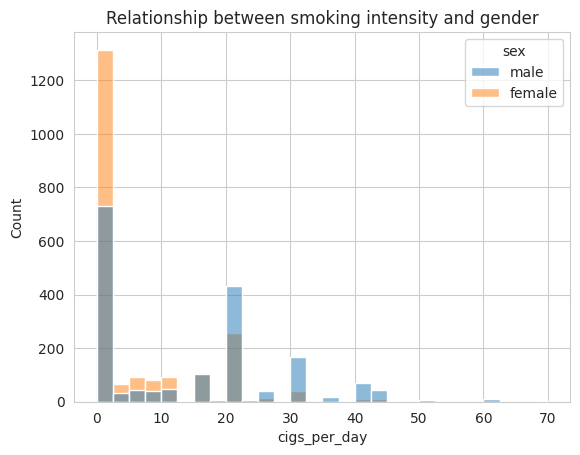

In [103]:
sns.histplot(data=df, x="cigs_per_day", hue="sex")
plt.title("Relationship between smoking intensity and gender")
plt.show()

We can see that the majority of individuals who smoke more than 20 cigarettes per day are **male.**

In [111]:
non_smoker = df[df["cigs_per_day"] == 0]

We are selecting individuals who do not smoke at all.

In [112]:
smoker = df[df["cigs_per_day"] > 20]


We are selecting individuals who smoke more than 20 cigarettes per day.

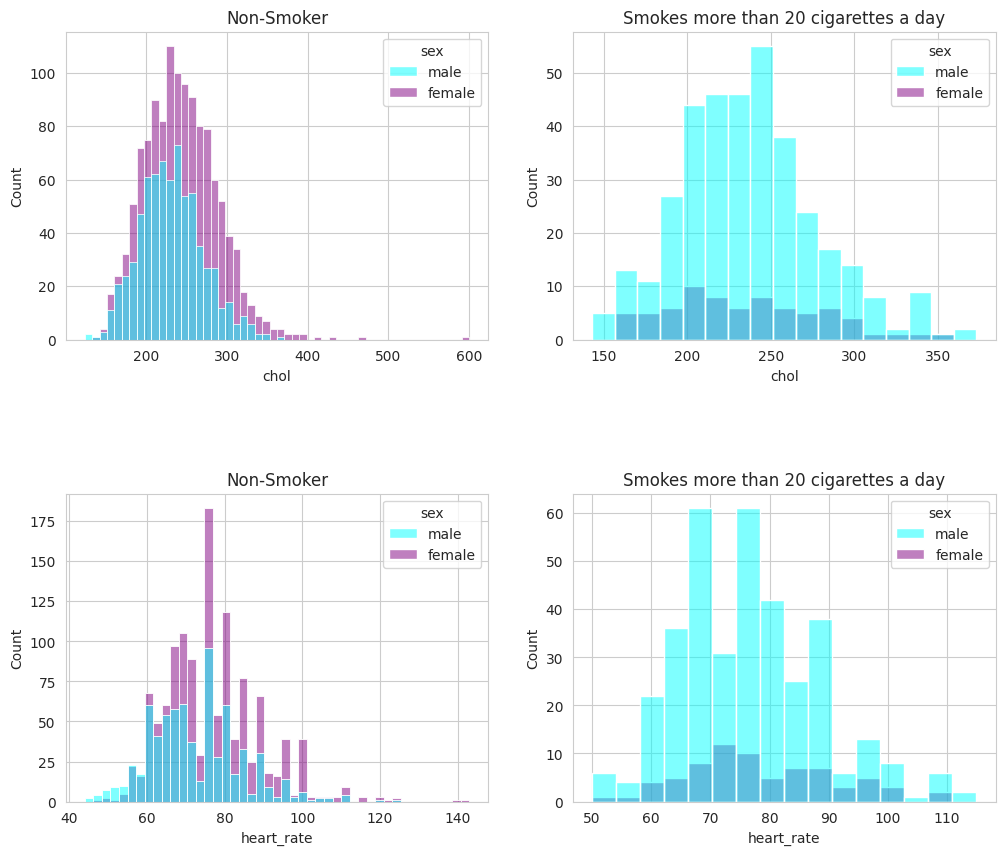

In [116]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(data=non_smoker, x="chol", hue="sex", palette={"female": "purple", "male": "cyan"})
plt.title("Non-Smoker")
plt.subplot(2,2,2)
sns.histplot(data=smoker, x="chol", hue="sex", palette={"female": "purple", "male": "cyan"})
plt.title("Smokes more than 20 cigarettes a day")
plt.subplot(2,2,3)
sns.histplot(data=non_smoker, x="heart_rate", hue="sex", palette={"female": "purple", "male": "cyan"})
plt.title("Non-Smoker")
plt.subplot(2,2,4)
sns.histplot(data=smoker, x="heart_rate", hue="sex", palette={"female": "purple", "male": "cyan"})
plt.title("Smokes more than 20 cigarettes a day")
plt.subplots_adjust(hspace=0.5)
plt.show()

There is no noticeable difference in heart rate and cholesterol between individuals who smoke **20 cigarettes per day** and those who **do not smoke at all.** This may be due to the small number of data points in the dataset.

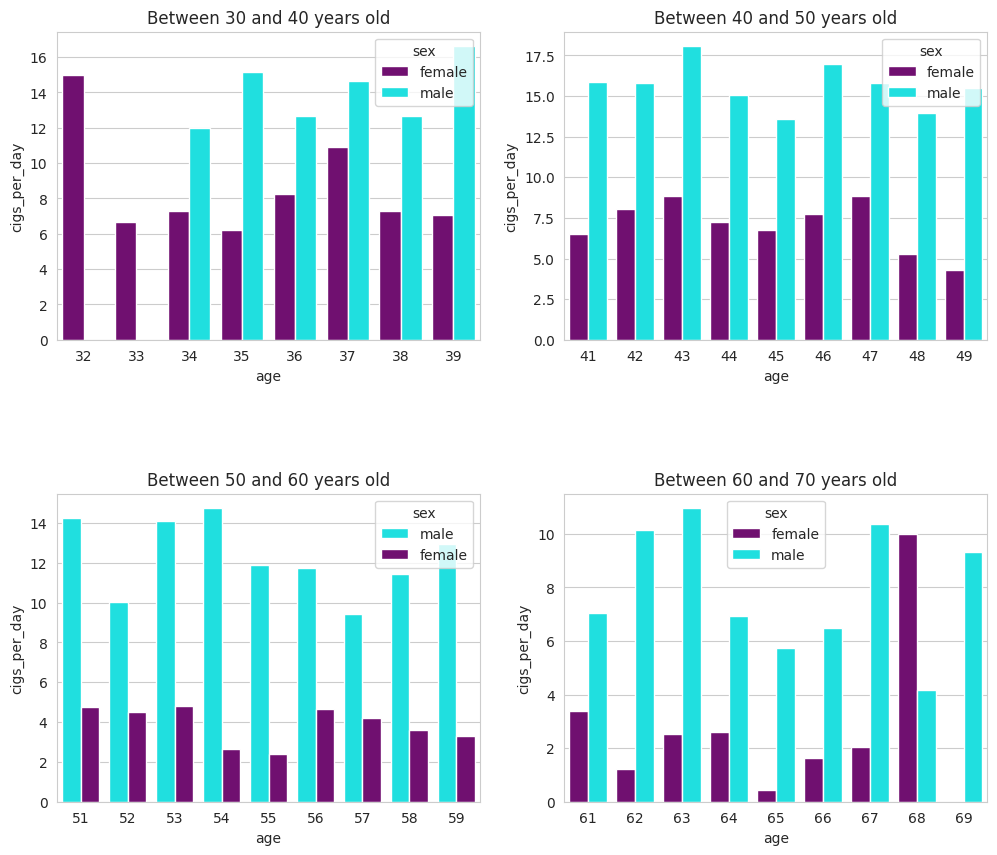

In [107]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot(x="age", y="cigs_per_day", hue="sex", data=df[(df["age"] > 30) & (df["age"] < 40)], errorbar=None, palette={"female": "purple", "male": "cyan"})
plt.title("Between 30 and 40 years old")
plt.subplot(2,2,2)
sns.barplot(x="age", y="cigs_per_day", hue="sex", data=df[(df["age"] > 40) & (df["age"] < 50)], errorbar=None, palette={"female": "purple", "male": "cyan"})
plt.title("Between 40 and 50 years old")
plt.subplot(2,2,3)
sns.barplot(x="age", y="cigs_per_day", hue="sex", data=df[(df["age"] > 50) & (df["age"] < 60)], errorbar=None, palette={"female": "purple", "male": "cyan"})
plt.title("Between 50 and 60 years old")
plt.subplot(2,2,4)
sns.barplot(x="age", y="cigs_per_day", hue="sex", data=df[(df["age"] > 60) & (df["age"] < 70)], errorbar=None, palette={"female": "purple", "male": "cyan"})
plt.title("Between 60 and 70 years old")
plt.subplots_adjust(hspace=0.5)
plt.show()

These bar plots allow us to observe cigarette consumption across age groups in comparison with gender. In particular, we conclude that the majority of smokers between the ages of **50 and 70** are **male.**

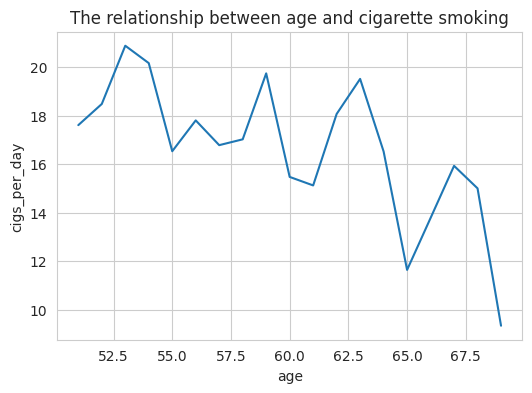

In [108]:
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.lineplot(x="age", y="cigs_per_day", data=df[(df["cigs_per_day"] > 0) & (df["age"] > 50)], errorbar=None)
plt.title("The relationship between age and cigarette smoking")
plt.show()

We can see that overall cigarette consumption **decreases** after the age of 50.

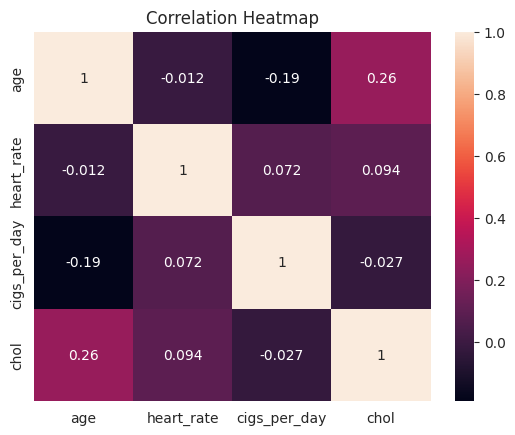

In [109]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

After examining the heatmap, we found that:


*   There is a positive correlation between age and cholesterol, meaning that as age increases, cholesterol also tends to increase.
*   There is a negative correlation between age and the number of cigarettes smoked per day, meaning that as age increases, the amount of cigarettes consumed decreases.


# Exploratory Data Analysis (EDA) by

> **ali irfan doğan** <br>
> [personal blog](https://alirfandogan.com/) <br>
> [github](https://github.com/norcholly/) <br>
> [linkedin](https://www.linkedin.com/in/ali-irfan-doğan) <br>



